In [1]:
import pandas as pd
import os


In [2]:
# C:\Users\lemon\OneDrive\Documents\GitHub\Fake-News-Detector\Datasets\Fake News Detection Datasets\News _dataset\Fake.csv
fake = pd.read_csv('datasets/Fake News Detection Datasets/News _dataset/Fake.csv')
true = pd.read_csv('datasets/Fake News Detection Datasets/News _dataset/True.csv')

print('the shape of the fake dataset is: ', fake.shape)
print('the shape of the true dataset is: ', true.shape)


the shape of the fake dataset is:  (23481, 4)
the shape of the true dataset is:  (21417, 4)


In [3]:
# Add a column to each dataframe to indicate whether the news is fake or not
fake['lable'] = 1
true['lable'] = 0


In [4]:
# Combine the two dataframes
data = pd.concat([fake, true], ignore_index=True)

In [5]:
data.head()

,title,text,subject,date,lable
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
# delete the date column
data.drop('date', axis=1, inplace=True)


In [8]:
# check for null values
data.isnull().sum()

title      0
text       0
subject    0
lable      0
dtype: int64

In [9]:
# shuffle the data
data = data.sample(frac=1).reset_index(drop=True)
data = data.reset_index(drop=True)
data.head()


,title,text,subject,lable
0,Trump likely to visit China during November As...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,0
1,WHOA! BEN CARSON Just Made Most Controversial ...,Will his comments about Barack Obama race hel...,politics,1
2,OBAMA’S DOJ: Lois Lerner Won’t Face Charges In...,Well this is no surprise but it s still wrong....,Government News,1
3,"FAKE NEWS WEEK: Truth, War Propaganda, CIA and...",In response to the establishment media s cont...,US_News,1
4,Donald Trump Gets HUMILIATED In The Most Epic...,"This is perfect.For months, Donald Trump has b...",News,1


In [10]:
# get all the distinct subjects
subjects = data['subject'].unique()

print(subjects)


['politicsNews' 'politics' 'Government News' 'US_News' 'News' 'left-news'
 'worldnews' 'Middle-east']


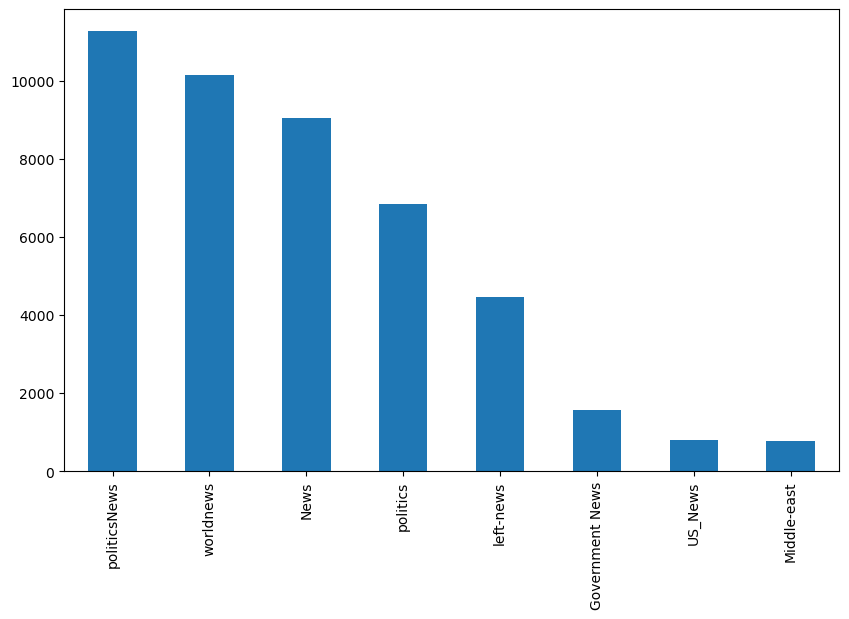

In [11]:
# plot the number of articles in each subject
plt.figure(figsize=(10, 6))
data['subject'].value_counts().plot(kind='bar')
plt.xticks(rotation=90)
plt.show()


In [12]:
# delete the title , subject columns

data.drop('title', axis=1, inplace=True)
data.drop('subject', axis=1, inplace=True)

In [13]:
data

,text,lable
0,WASHINGTON (Reuters) - U.S. President Donald T...,0
1,Will his comments about Barack Obama race hel...,1
2,Well this is no surprise but it s still wrong....,1
3,In response to the establishment media s cont...,1
4,"This is perfect.For months, Donald Trump has b...",1
...,...,...
44893,MOSCOW (Reuters) - Russia has carried out 18 b...,0
44894,Trump is famous for his You re fired catchph...,1
44895,WASHINGTON (Reuters) - House of Representative...,0
44896,"(In this Sept. 13 story, corrects definition ...",0


In [14]:
# prepare the text column to be used in the model

# remove the punctuation
data['text'] = data['text'].str.replace('[^\w\s]', '')

C:\Users\lemon\AppData\Local\Temp\ipykernel_15672\606336.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  data['text'] = data['text'].str.replace('[^\w\s]', '')


In [15]:

# remove the stopwords
from nltk.corpus import stopwords

def remove_stopwords(text):
    words = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    return " ".join(words)

#data['text'] = data['text'].apply(remove_stopwords)

In [16]:
# stemming
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

def stemming(text):
    words = [stemmer.stem(word) for word in text.split()]
    return " ".join(words)

#data['text'] = data['text'].apply(stemming)

In [17]:
# remove URLs
import re

def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)

#data['text'] = data['text'].apply(remove_URL)

In [18]:
# convert the text to lowercase
data['text'] = data['text'].str.lower()

In [19]:
# convert numbers into the token 'num'
data['text'] = data['text'].str.replace('\d+', 'num')

C:\Users\lemon\AppData\Local\Temp\ipykernel_15672\1985515768.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['text'] = data['text'].str.replace('\d+', 'num')


In [20]:
#remove new line characters
data['text'] = data['text'].str.replace('\n', ' ')

In [21]:
# save the data
data.to_csv('datasets/Fake News Detection Datasets/News _dataset/combined.csv', index=False)


In [22]:
# load the data
data = pd.read_csv('datasets/Fake News Detection Datasets/News _dataset/combined.csv')

In [23]:
data['text']

0        washington reuters  us president donald trump ...
1        will his comments about barack obama  race hel...
2        well this is no surprise but it s still wrong ...
3         in response to the establishment media s cont...
4        this is perfectfor months donald trump has bee...
                               ...                        
44893    moscow reuters  russia has carried out num bom...
44894    trump is famous for his  you re fired  catchph...
44895    washington reuters  house of representatives d...
44896     in this sept num story corrects definition of...
44897    nbc was in  cover your ass  mode with their lo...
Name: text, Length: 44898, dtype: object

In [24]:
# split the data into training and testing

from sklearn.model_selection import train_test_split

X = data['text']
y = data['lable']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('the shape of the training data is: ', X_train.shape)
print('the shape of the testing data is: ', X_test.shape)


the shape of the training data is:  (35918,)
the shape of the testing data is:  (8980,)


In [25]:
# convert the text data into numerical data
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()



X_train = vectorizer.fit_transform(X_train.values.astype('U'))
X_test = vectorizer.transform(X_test.values.astype('U'))

print('the shape of the training data is: ', X_train.shape)
print('the shape of the testing data is: ', X_test.shape)



the shape of the training data is:  (35918, 194214)
the shape of the testing data is:  (8980, 194214)


# Logistic Regression

In [26]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()

In [27]:
# train the model
LR.fit(X_train, y_train)

LogisticRegression()

In [28]:
# make predictions
y_pred = LR.predict(X_test)

In [29]:
# evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

LogisticRegression_accuracy = accuracy_score(y_test, y_pred)

print('the accuracy of the model is: ', LogisticRegression_accuracy)

the accuracy of the model is:  0.9891982182628062


In [30]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4233
           1       0.99      0.99      0.99      4747

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



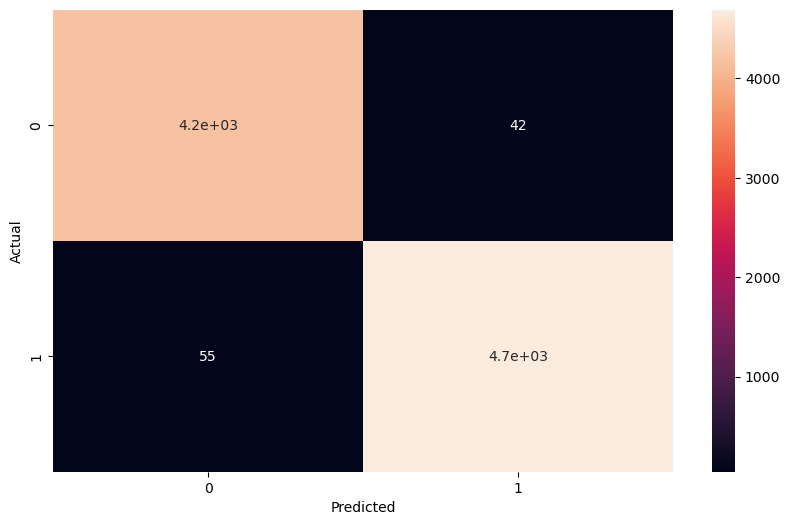

In [31]:
# make a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)



plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
# save the model
import joblib

joblib.dump(LR, 'models/LogisticRegression_model.pkl')

# Decision Tree

In [32]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()


In [33]:
# train the model
DT.fit(X_train, y_train)

DecisionTreeClassifier()

In [34]:
# make predictions
y_pred = DT.predict(X_test)


In [35]:
# evaluate the model
DecisionTree_accuracy = accuracy_score(y_test, y_pred)

print('the accuracy of the model is: ', DecisionTree_accuracy)

the accuracy of the model is:  0.9966592427616926


In [36]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4233
           1       1.00      1.00      1.00      4747

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



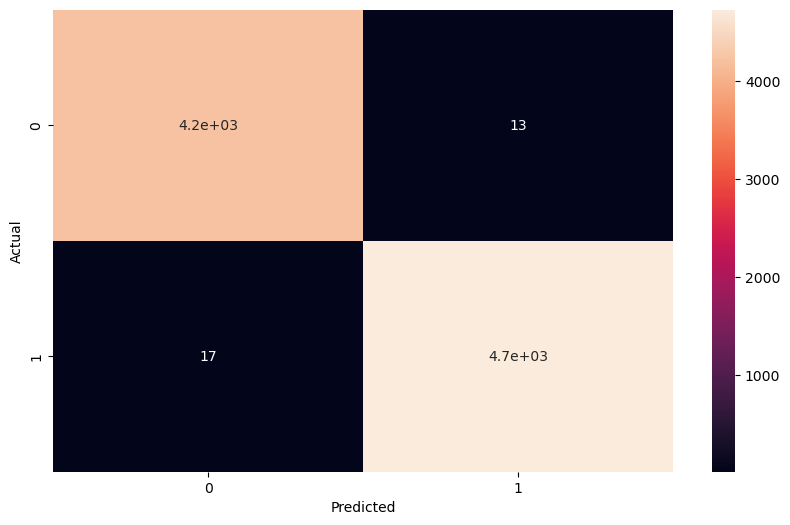

In [37]:
# make a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# plot the confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# save the model
joblib.dump(DT, 'models/DecisionTree_model.pkl')

# Random Forest

In [38]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()

In [39]:
# train the model
RF.fit(X_train, y_train)


In [ ]:
# make predictions
y_pred = RF.predict(X_test)

In [ ]:
# evaluate the model
RandomForest_accuracy = accuracy_score(y_test, y_pred)

print('the accuracy of the model is: ', RandomForest_accuracy)

the accuracy of the model is:  0.9875278396436525


In [ ]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4367
           1       0.99      0.98      0.99      4613

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



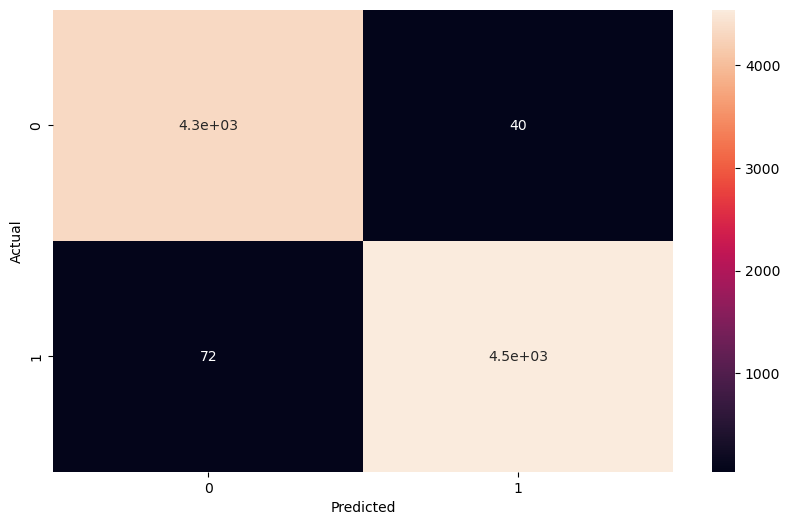

In [ ]:
# make a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# plot the confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# save the model
joblib.dump(RF, 'models/RandomForest_model.pkl')

# Gradient Boosting

In [ ]:
# Gradient Boosting Classifier

from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier()


In [ ]:
# train the model
GBC.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
# make predictions
y_pred = GBC.predict(X_test)

In [ ]:
# evaluate the model
GradientBoostingClassifier_accuracy = accuracy_score(y_test, y_pred)

print('the accuracy of the model is: ', GradientBoostingClassifier_accuracy)

the accuracy of the model is:  0.994543429844098


In [ ]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4367
           1       1.00      0.99      0.99      4613

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



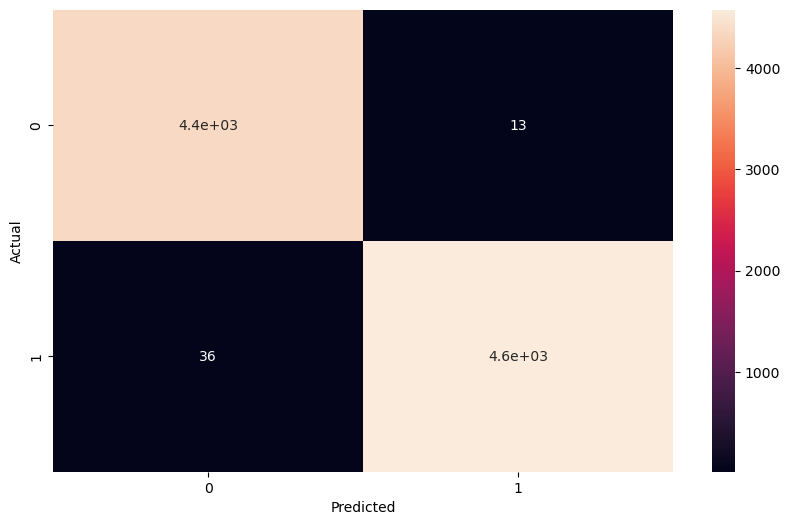

In [ ]:
# make a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# plot the confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# save the model
joblib.dump(GBC, 'models/GradientBoostingClassifier_model.pkl')

# Support Vector Machine

In [ ]:
# Support Vector Machine

from sklearn.svm import SVC

SVM = SVC()

In [ ]:
# train the model
SVM.fit(X_train, y_train)

SVC()

In [ ]:
# make predictions
y_pred = SVM.predict(X_test)

In [ ]:
# evaluate the model
SVM_accuracy = accuracy_score(y_test, y_pred)

print('the accuracy of the model is: ', SVM_accuracy)

the accuracy of the model is:  0.9927616926503341


In [ ]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4367
           1       0.99      0.99      0.99      4613

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



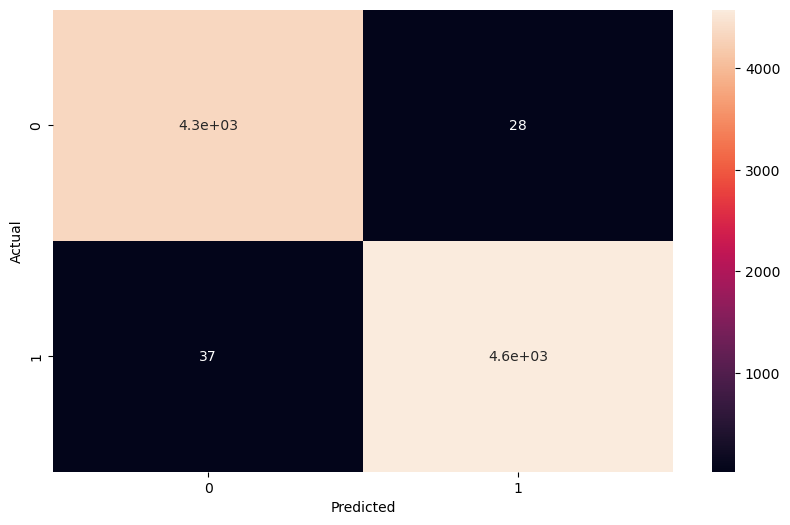

In [ ]:
# make a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# plot the confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# save the model
joblib.dump(SVM, 'models/SVM_model.pkl')

# Using the models

In [ ]:
import joblib

def choose_model():
    print('choose the model you want to use: ')
    print('1. Logistic Regression')
    print('2. Decision Tree')
    print('3. Random Forest')
    print('4. Gradient Boosting Classifier')
    print('5. Support Vector Machine')

    x = input('Enter the number of the model you want to use: ')

    # load the model based on the user's choice
    if x == '1':
        model = joblib.load('models/LogisticRegression_model.pkl')
        return model
    elif x == '2':
        model = joblib.load('models/DecisionTree_model.pkl')
        return model
    elif x == '3':
        model = joblib.load('models/RandomForest_model.pkl')
        return model
    elif x == '4':
        model = joblib.load('models/GradientBoostingClassifier_model.pkl')
        return model
    elif x == '5':
        model = joblib.load('models/SVM_model.pkl')
        return model
    else:
        print('invalid input')
        model = None


In [ ]:
def Fake_News_Detector(text , model):

    if model == None:
        return 'Please choose a model'
    else :
        text = remove_stopwords(text)
        text = stemming(text)
        text = remove_URL(text)
        text = text.lower()
        text = re.sub('\d+', 'num', text)
        text = text.replace('\n', ' ')
        text = vectorizer.transform([text])
        prediction = model.predict(text)
        if prediction == 1:
            return 'Fake News'
        else:
            return 'Real News'

In [ ]:

# test the model
text = ""
model = LR
print(Fake_News_Detector(text, model))

Real News
